# UCDMCMC Tutorial

## Author
Adam Burgasser

## Version date
25 Sep 2025

## Summary
This tutorial aims to demonstrate some of the key tools provided in the UCDMCMC package

## Learning Goals
* Examining the provided model sets
* Configuring spectral data
* Conducting a grid fit of spectral data to models
* Conducting an MCMC fit of spectral data to models
* Generating new model sets (requires RAW models in SPLAT)

## Required packages
* ucdmcmc
* splat
* astropy
* matplotlib
* numpy

## Keywords
spectral analysis, ultracool dwarfs

## Companion Content
None


In [1]:
# import statements
import ucdmcmc
import numpy as np
from astropy.utils.data import download_file
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt
import copy
%matplotlib inline



Welcome to the UCDMCMC spectral fitting code!
This code is designed to conduct both grid and MCMC fitting of spectral data of ultracool dwarfs
You are currently using version dated 2025.09.24

If you make use of this code for your research, please remember to cite our Zenodo DOI:
	10.5281/zenodo.16923762 (https://doi.org/10.5281/zenodo.16923762)
If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, http://www.github.com/aburgasser/ucdmcmc/


Currently running in error checking mode


### Model sets
``ucdmcmc`` currently comes equipped with 5 sets of models interpolated onto wavelegnth scales for the IRTF/SpeX (prism model) and JWST NIRSPEC (prism mode) instruments:

* atmospp: [Meisner et al. (2023)](https://ui.adsabs.harvard.edu/abs/2023AJ....166...57M)
* btsettl08: [Allard et al. (2012)](https://ui.adsabs.harvard.edu/abs/2012RSPTA.370.2765A)
* dback24: Sonora diamondback, [Morley et al. (2024)](https://ui.adsabs.harvard.edu/abs/2024arXiv240200758M)
* karalidi21: Sonora cholla, [Karalidi et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...923..269K)
* lacy23: [Lacy & Burrows(2023)](https://ui.adsabs.harvard.edu/abs/2023ApJ...950....8L)

Additional models have been pre-computed for instruments JWST/NIRSpec/G395H, JWST/MIRI/LRS, Euclid, and a generic NIR (0.8-2.5 µm) range, and are available for download at http://spexarchive.coolstarlab.ucsd.edu/ucdmcmc :

* atmo: [Phillips et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020A%26A...637A..38P)
* btcond: [Allard et al. (2012)](https://ui.adsabs.harvard.edu/abs/2012RSPTA.370.2765A)
* btdusty16: [Allard et al. (2012)](https://ui.adsabs.harvard.edu/abs/2012RSPTA.370.2765A)
* burrow06: [Burrows et al. (2006)](https://ui.adsabs.harvard.edu/abs/2006ApJ...640.1063B)
* elfowl24: Sonora elfowl, [Mukherjee et al. (2024)](https://ui.adsabs.harvard.edu/abs/2024ApJ...963...73M)
* elfowl24-ph3: Sonora elfowl + PH3, [Beiler et al. (2024)](https://ui.adsabs.harvard.edu/abs/2024ApJ...973...60B)
* helios: [Kitzmann et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020ApJ...890..174K)
* lowz: [Meisner et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...915..120M)
* madhu11: [Madhusudhan et al. (2011)](https://ui.adsabs.harvard.edu/abs/2021ApJ...915..120M)
* morley12: [Morley et al. (2012)](https://ui.adsabs.harvard.edu/abs/2012ApJ...756..172M)
* morley14: [Morley et al. (2012)](https://ui.adsabs.harvard.edu/abs/2014ApJ...787...78M)
* sand24: [Alvarado et al. (2024)](https://ui.adsabs.harvard.edu/abs/2024RNAAS...8..134A)
* saumon12: [Saumon et al. (2012)](https://ui.adsabs.harvard.edu/abs/2012ApJ...750...74S)
* sonora21: Sonora bobcat, [Marley et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...920...85M)
* sphinx23: SPHINX, [Iyer et al. (2023)](https://ui.adsabs.harvard.edu/abs/2023ApJ...944...41I)
* tremblin15: [Tremblin et al. (2015)](https://ui.adsabs.harvard.edu/abs/2015ApJ...804L..17T)

These models should be stored locally in the folder ~/.ucdmcmc_models in your home directory (this is generated on your first import of ucdmcmc). 

It is also possible to generate a set of new set of models if an existing "raw" set has been provided; these can be created using the ``createModelSet()`` function.

All models can be accessed with the ``getModelSet()`` function.


In [2]:
# function to get information on all the models currently downloaded
ucdmcmc.modelInfo()


Model set atmo20:
	Computed for instruments SPEX-PRISM, JWST-NIRSPEC-PRISM, NIR
	Parameters:
Using model data file /Users/adam/.ucdmcmc_models/models_atmo20_SPEX-PRISM.h5
		ad: 1.0 to 1.1
		broad: A, B
		cld: LC, RO
		kzz: 0.0 to 8.0
		logg: 4.5 to 5.5
		logpmax: 4.0
		logpmin: -8.0 to -0.0
		teff: 600.0 to 2000.0
		z: -0.0
	aka ATMO2020 models from Phillips et al. (2020) (bibcode = 2020A%26A...637A..38P)

Model set atmo20pp:
	Computed for instruments SPEX-PRISM, JWST-NIRSPEC-PRISM, JWST-NIRSPEC-PRISM, JWST-MIRI-LRS, JWST-NIRSPEC-G395H, EUCLID, NIR, JWST-NIRSPEC-G395H, JWST-NIRSPEC-MIRI, JWST-NIRSPEC-MIRI, JWST-MIRI-LRS
	Parameters:
Using model data file /Users/adam/python_codes/ucdmcmc/src/ucdmcmc/models/models_atmo20pp_SPEX-PRISM.h5
		kzz: 4.0 to 10.0
		logg: 2.5 to 5.5
		teff: 250.0 to 1200.0
		z: -1.0 to 0.3
	aka ATMO2020++ models from Meisner et al. (2023) (bibcode = 2023AJ....166...57M)

Model set btcond:
	Computed for instruments JWST-NIRSPEC-PRISM
	Parameters:
Using model data

In [3]:
# information for specific model
ucdmcmc.modelInfo('lacy23')


Model set lacy23:
	Computed for instruments JWST-NIRSPEC-PRISM, SPEX-PRISM, JWST-MIRI-LRS, NIR, JWST-NIRSPEC-G395H, EUCLID, JWST-NIRSPEC-MIRI
	Parameters:
Using model data file /Users/adam/python_codes/ucdmcmc/src/ucdmcmc/models/models_lacy23_JWST-NIRSPEC-PRISM.h5
		cld: AEE10, E10, NC
		kzz: -0.0 to 6.0
		logg: 4.0 to 5.0
		teff: 400.0 to 600.0
		z: -0.5 to 0.52
	aka Lacy & Burrows (2023) models from Lacy & Burrows (2023) (bibcode = 2023ApJ...950....8L)


In [4]:
# getModelSet reads in both the models and wavelength grid
models,wave = ucdmcmc.getModelSet('sand24','JWST-NIRSPEC-PRISM')
models[:10]

Using model data file /Users/adam/.ucdmcmc_models/models_sand24_JWST-NIRSPEC-PRISM.h5


,model,enrich,logg,teff,z,file,flux
0,sand24,0.35,5.0,1500.0,-2.20,/Users/adam/projects/splat/models/sand24/RAW/s...,"[229833.37436852168, 227768.85492245917, 22355..."
1,sand24,-0.05,6.0,1200.0,-0.15,/Users/adam/projects/splat/models/sand24/RAW/s...,"[670.4901951034585, 123.88221880714408, 52.988..."
2,sand24,0.30,5.0,1400.0,-0.15,/Users/adam/projects/splat/models/sand24/RAW/s...,"[200544.39782249226, 101600.14295049556, 49719..."
3,sand24,0.35,4.5,2800.0,-1.10,/Users/adam/projects/splat/models/sand24/RAW/s...,"[239304812.55353403, 217692714.25611952, 26492..."
4,sand24,0.30,5.5,2000.0,-1.95,/Users/adam/projects/splat/models/sand24/RAW/s...,"[2134771.9748796355, 1919834.4632711937, 19658..."
5,sand24,-0.00,6.0,1400.0,0.30,/Users/adam/projects/splat/models/sand24/RAW/s...,"[16350.164916210713, 4462.7757069671425, 2044...."
6,sand24,0.15,5.0,1700.0,-1.30,/Users/adam/projects/splat/models/sand24/RAW/s...,"[343627.32358060917, 340429.2073915344, 359233..."
7,sand24,-0.00,4.5,2600.0,-0.35,/Users/adam/projects/splat/models/sand24/RAW/s...,"[65957951.194166146, 61704761.67214525, 806155..."
8,sand24,0.40,5.5,2300.0,-0.60,/Users/adam/projects/splat/models/sand24/RAW/s...,"[9380633.583890267, 8585477.234553741, 1069541..."
9,sand24,0.15,5.5,1000.0,0.30,/Users/adam/projects/splat/models/sand24/RAW/s...,"[210.41410108309702, 48.13635823542758, 27.879..."


<Figure size 640x480 with 0 Axes>

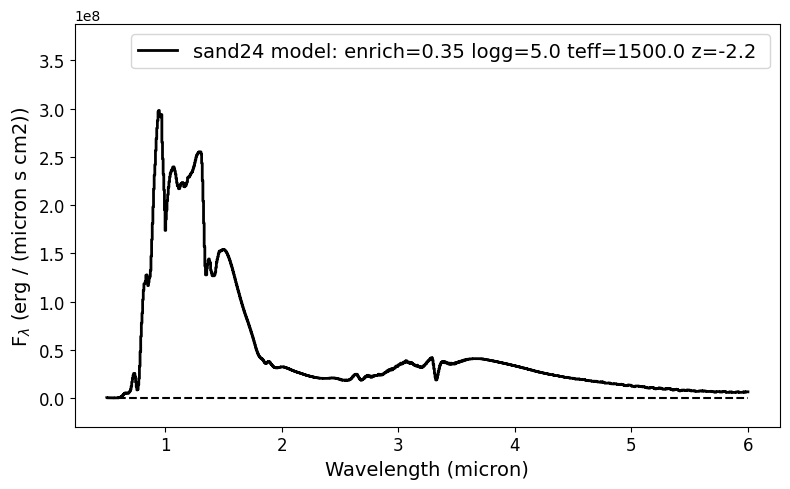

In [5]:
# select one of the models and plot it
par = dict(models.iloc[0])
mdl = ucdmcmc.getGridModel(models,par,wave)
mdl.plot()

## Preparing spectral data

``ucdmcmc`` reads spectral data into a ``Spectrum`` class that includes functions to read in and prepare an observed spectrum before fitting to the models:

* math functions (+, -, /, x) that properly account for noise combination and units
* ``scale()`` scales the spectrum by a constant scale factor
* ``sample()`` samples the flux in a specified region in a spectrum
* ``normalize()`` normalizes the spectrum in a given wavelength range
* ``mask()`` masks out sections of a spectrum (e.g., telluric regions)
* ``clean()`` automatically identifies pixel outliers and cleans the spectrum of these
* ``fluxConvert()`` converts fluxes and uncertainties to desired flux units (including f$_\lambda$ and f$_\nu$)
* ``toWavelengths()`` maps a spectrum to a provided wavelength grid
* ``shift()`` shifts a spectrum by pixel or wavelength
* ``RVshift()`` shifts a spectrum based on radial velocity
* ``broaden()`` broadens spectral lines based on rotation or a provided broadening kernel
* ``redden()`` reddens a spectrum using the Cardelli, Clayton, and Mathis (1989) law
* ``filterMag()`` computes a filter-based magnitude from a spectrum (NB: uses SPLAT tools)
* ``fluxCalibrate()`` scales a spectrum based on a given filter-based magnitude (NB: uses SPLAT tools)
* ``trim()`` trims the spectrum to the specific wavelength range
* ``plot()`` provides a plot of a spectrum

``ucdmcmc`` also includes sample spectra to explore the fitting routines.


In [6]:
# read in sample NIRSpec Prism spectrum
sp = ucdmcmc.getSample(instrument='JWST-NIRSPEC-PRISM')
sp.info()

Reading in sample spectrum for instrument JWST-NIRSPEC-PRISM of source UNCOVER 33336

JWST-NIRSPEC-PRISM spectrum of UNCOVER 33336

Wave range = 0.58--5.33 micron
Flux range = -1.04e-16--2.00e-16 erg / (micron s cm2)
Average 1-pixel resolution = 334
S/N = 2 (50%), 7 (90%)

Citation bibcode reference 2024ApJ...962..177B (https://ui.adsabs.harvard.edu/abs/2024ApJ...962..177B/abstract)



<Figure size 640x480 with 0 Axes>

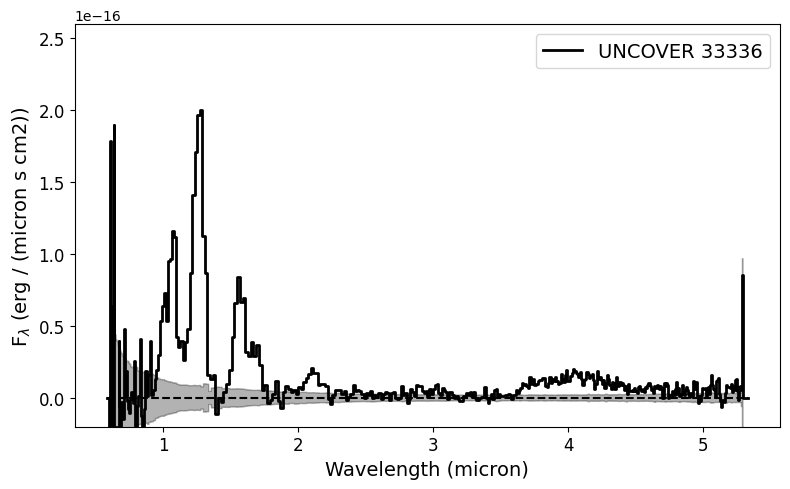

In [7]:
# plot spectrum
sp.plot()

<Figure size 640x480 with 0 Axes>

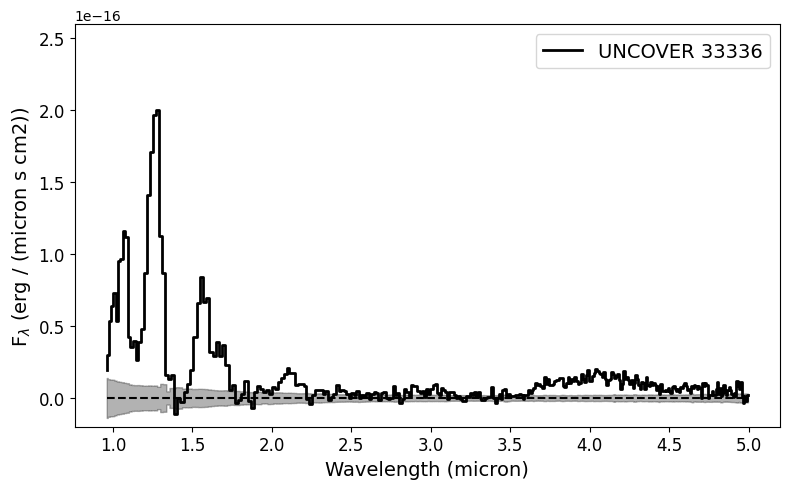

In [8]:
# trim down to get rid of noisy end bits
sp.trim([0.95,5])
sp.plot()

<Figure size 640x480 with 0 Axes>

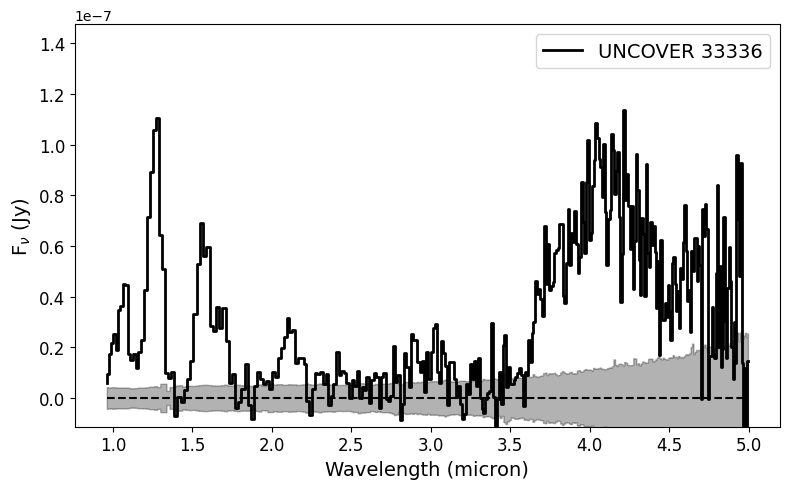

In [9]:
# convert to f_nu
sp.fluxConvert(u.Jy)
sp.plot()

## Conducting a grid fit

The simplest fit is comparing a spectrum to all of the models using ``fitGrid()``. The typical steps are:

* read in your model grid with ``getModelSet()``
* read in data and make any adjustments you feel are needed (e.g., flux calibration)
* map the observed spectrum to the model grid wavelength scale using ``toWavelengths()``
* run ``fitGrid()``

``fitGrid()`` creates two files for examining your fit (PREFIX is the file prefix you pass):
* PREFIX_compare.pdf - compares data to current best fit model
* PREFIX_parameters.xlsx - parameters for all the chains and the chi^2 and scale values 


Using model data file /Users/adam/python_codes/ucdmcmc/src/ucdmcmc/models/models_dback24_SPEX-PRISM.h5
Reading in sample spectrum for instrument SPEX-PRISM of source 2MASS J0559-1404

SPEX-PRISM spectrum of 2MASS J0559-1404

Wave range = 0.65--2.56 micron
Flux range = -6.05e-12--1.63e-11 erg / (micron s cm2)
Average 1-pixel resolution = 491
S/N = 17 (50%), 96 (90%)

Citation bibcode reference 2006ApJ...637.1067B (https://ui.adsabs.harvard.edu/abs/2006ApJ...637.1067B/abstract)



/opt/miniconda3/lib/python3.12/site-packages/spectres/spectral_resampling.py:104: RuntimeWarning: Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument (by default 0).
  warnings.warn(



Best parameters:
	model = dback24
	fsed = 10.0
	logg = 4.5
	teff = 1200.0
	z = -0.0
	scale = 7.38172760019525e-20
	chis = 56225.77316046641
	radius = 0.1205056887567339
	dof = 390.0
	rchi = 144.16864912940105


<Figure size 640x480 with 0 Axes>

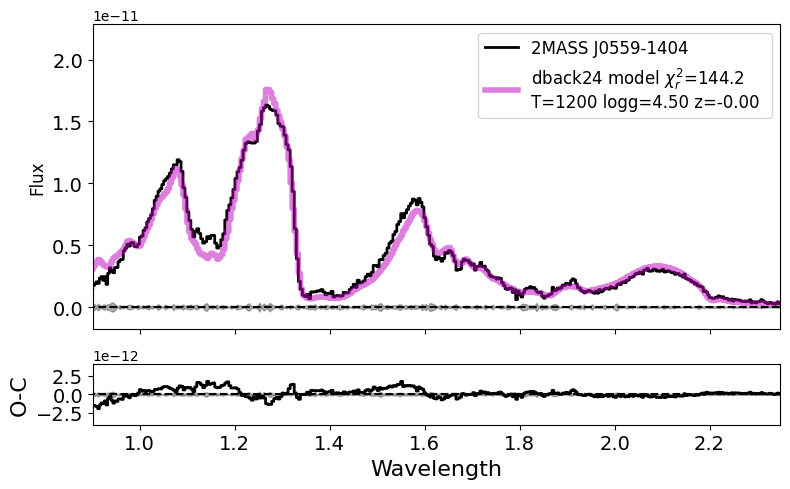

In [10]:
# Read in diamondback models from Morley et al. (2024) mapped to SpeX-prism 
models,wave = ucdmcmc.getModelSet('dback24','SPEX-PRISM')

# read in sample IRTF/SpeX spectrum
sp = ucdmcmc.getSample(instrument='SPEX-PRISM')
sp.info()

# trim spectrum
sp.trim([0.9,2.35])

# map spectrum to grid models
sp.toWavelengths(wave)

# run gridfit - plots are saved to 'test_*.pdf'
par = ucdmcmc.fitGrid(sp,models,file_prefix='test')


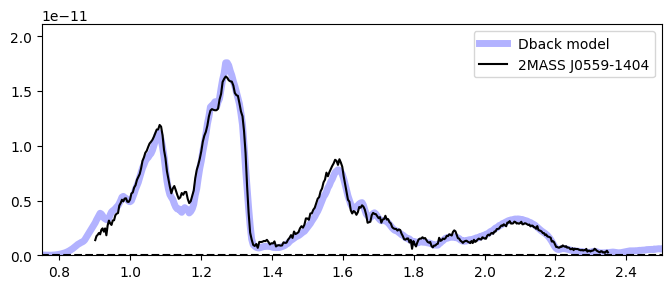

In [11]:
# redisplay comparison if you want to make a better plot

# read in the relevant model based on the parameters
mdl = ucdmcmc.getGridModel(models,par,wave)

plt.figure(figsize=[8,3])
plt.clf()
plt.fill_between(wave,mdl.flux.value+3.*mdl.noise.value,mdl.flux.value-3.*mdl.noise.value,facecolor='k',alpha=0.5)
plt.plot(wave,mdl.flux,'b-',lw=5,alpha=0.3,label='Dback model')
plt.plot(wave,sp.flux,'k-',label=sp.name)
plt.plot(wave,wave*0.,'k--')
plt.xlim([0.75,2.5])
plt.ylim([0,np.nanmax(mdl.flux.value)*1.2])
plt.legend()
plt.show()


Using model data file /Users/adam/python_codes/ucdmcmc/src/ucdmcmc/models/models_dback24_SPEX-PRISM.h5
Reading in sample spectrum for instrument SPEX-PRISM of source 2MASS J0559-1404


Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
You are currently using version 2025.08.23

If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/



Best parameters:
	model = dback24
	fsed = 10.0
	logg = 4.5
	teff = 1200.0
	z = -0.0
	scale = 7.377298050453715e-20
	chis = 56225.773160466415
	radius = 0.1204695274356581
	dof = 390.0
	rchi = 144.16864912940108


<Figure size 640x480 with 0 Axes>

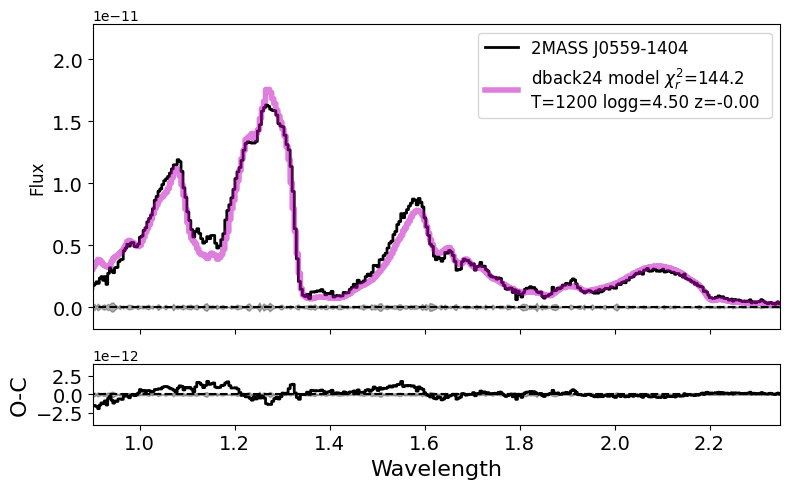

In [12]:
# redo but scale to the absolute magnitude to get a reasonable estimate of radius
# note that this requires a functioning SPLAT package to do the flux calibration
absfilt = '2MASS J'
plx = 95.3 # gaia
mag = 13.802
absmag = mag+5*np.log10(plx/100)

# Read in diamondback models from Morley et al. (2024) mapped to SpeX-prism 
models,wave = ucdmcmc.getModelSet('dback24','SPEX-PRISM')

# read in sample IRTF/SpeX spectrum
sp = ucdmcmc.getSample(instrument='SPEX-PRISM')

# flux calibrate
sp.fluxCalibrate(absfilt,absmag)

# trim spectrum
sp.trim([0.9,2.35])

# map spectrum to grid models
sp.toWavelengths(wave)

# run gridfit - plots are saved to 'test_*.pdf'
par = ucdmcmc.fitGrid(sp,models,file_prefix='test',absolute=True)


Using model data file /Users/adam/python_codes/ucdmcmc/src/ucdmcmc/models/models_dback24_JWST-NIRSPEC-PRISM.h5
Reading in sample spectrum for instrument JWST-NIRSPEC-PRISM of source UNCOVER 33336

JWST-NIRSPEC-PRISM spectrum of UNCOVER 33336

Wave range = 0.58--5.33 micron
Flux range = -1.04e-16--2.00e-16 erg / (micron s cm2)
Average 1-pixel resolution = 334
S/N = 2 (50%), 7 (90%)

Citation bibcode reference 2024ApJ...962..177B (https://ui.adsabs.harvard.edu/abs/2024ApJ...962..177B/abstract)


Best parameters:
	model = dback24
	fsed = 10.0
	logg = 5.5
	teff = 1100.0
	z = -0.0
	scale = 9.221171573778434e-25
	chis = 1782.8335622432269
	radius = 0.0004259136837092894
	dof = 742.0
	rchi = 2.4027406499234862


<Figure size 640x480 with 0 Axes>

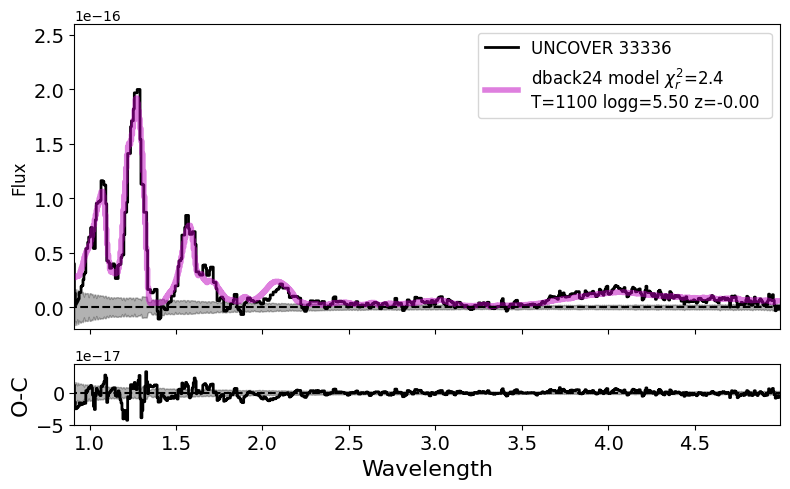

Estimated distance = 1878 pc


In [13]:
# Example with JWST NIRSpec Prism spectrum
models,wave = ucdmcmc.getModelSet('dback24','JWST-NIRSPEC-PRISM')

# read in spectrum from online location from Burgasser et al. 2023
sp = ucdmcmc.getSample(instrument='JWST-NIRSPEC-PRISM')
sp.info()

# scale to F444W AB magnitude
mag = 26.97
sp.fluxCalibrate('F444W',mag,ab=True)

# trim spectrum
sp.trim([0.9,5])

# map spectrum to grid models
sp.toWavelengths(wave)

# run gridfit
par = ucdmcmc.fitGrid(sp,models,file_prefix='test',verbose=False)

# use radius to infer distance
rtrue = 0.08 # expected radius
distance = 10*u.pc*(rtrue/par['radius'])
print('Estimated distance = {:.0f}'.format(distance))


## Conducting an MCMC fit

MCMC fits can be used after the grid fit to refine the solution and infer the uncertainties in the parameters

* read in your model grid with ``getModelSet()``
* read in data and make any adjustments you feel are needed
* map the observed spectrum to the model grid wavelength scale using ``toWavelengths()``
* run ``fitGrid()`` to get the initial parameter guesses
* run ``fitMCMC()`` to get the best fit and parameter uncertainties

``fitMCMC()`` creates four files for examining your fits that are continuously updated during the MCMC run:
* PREFIX_compare.pdf - compares data to current best fit model
* PREFIX_chains.pdf - shows the variation in parameters as the chain progresses
* PREFIX_corner.pdf - corner plot showing those parameters that are varying 
* PREFIX_parameters.xlsx - parameters for all the chains and the chi^2 and scale values 


Using model data file /Users/adam/python_codes/ucdmcmc/src/ucdmcmc/models/models_dback24_SPEX-PRISM.h5
Reading in sample spectrum for instrument SPEX-PRISM of source 2MASS J0559-1404

Best parameters:
	model = dback24
	fsed = 10.0
	logg = 4.5
	teff = 1200.0
	z = -0.0
	scale = 7.360090102758529e-20
	chis = 56225.77316046643
	radius = 0.12032894455623665
	dof = 390.0
	rchi = 144.1686491294011


<Figure size 640x480 with 0 Axes>

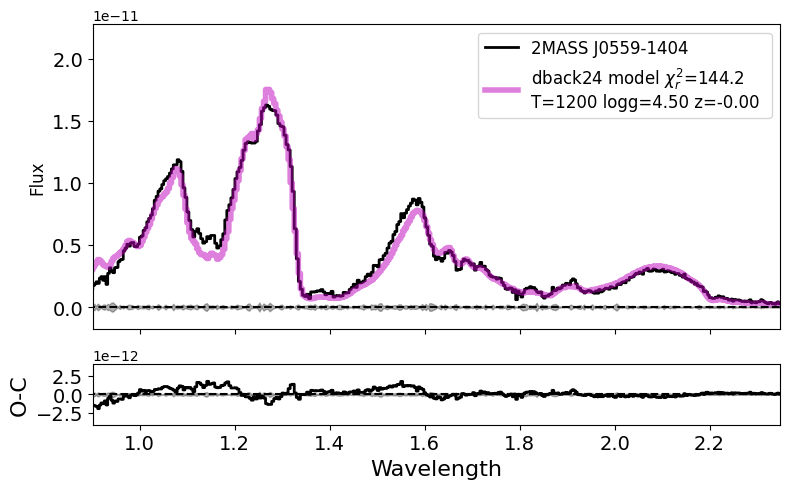

100%|███████████████████████████████████████| 1000/1000 [00:47<00:00, 21.10it/s]



Best parameters:
	model: dback24
	fsed: 10.0
	logg: 3.7778352510598268
	teff: 1181.280838091188
	z: -0.32184941398393874
	scale: 8.304658275328197e-20
	chis: 50505.4851932629
	radius: 0.1278172369680387
	dof: 386
	rchi: 144.1686491294011


<Figure size 640x480 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 1180x1180 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 1180x1180 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 1180x1180 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

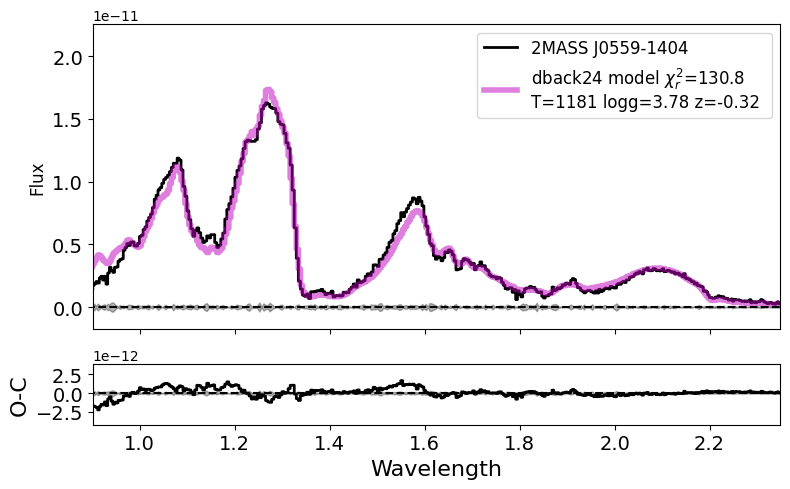

In [14]:
# Example with SpeX prism data
# Read in diamondback models from Morley et al. (2024) mapped to SpeX-prism 
models,wave = ucdmcmc.getModelSet('dback24','SPEX-PRISM')

# read in sample IRTF/SpeX spectrum
sp = ucdmcmc.getSample(instrument='SPEX-PRISM')

# flux calibrate to absolute magnitude
mag = 13.70
sp.fluxCalibrate('2MASS J',mag)

# trim spectrum
sp.trim([0.9,2.35])

# map spectrum to grid models
sp.toWavelengths(wave)

# get initial parameters from gridfit
ipar = ucdmcmc.fitGrid(sp,models,file_prefix='test',absolute=True)

# run gridfit to get the final parameters
par = ucdmcmc.fitMCMC(sp,models,p0=ipar,nstep=1000,iterim=250,report=True,file_prefix='mcmctest',absolute=True,verbose=False)


Using model data file /Users/adam/python_codes/ucdmcmc/src/ucdmcmc/models/models_dback24_JWST-NIRSPEC-PRISM.h5
Reading in sample spectrum for instrument JWST-NIRSPEC-PRISM of source UNCOVER 33336

JWST-NIRSPEC-PRISM spectrum of UNCOVER 33336

Wave range = 0.58--5.33 micron
Flux range = -1.04e-16--2.00e-16 erg / (micron s cm2)
Average 1-pixel resolution = 334
S/N = 2 (50%), 7 (90%)

Citation bibcode reference 2024ApJ...962..177B (https://ui.adsabs.harvard.edu/abs/2024ApJ...962..177B/abstract)


Best parameters:
	model = dback24
	fsed = 10.0
	logg = 5.5
	teff = 1100.0
	z = -0.0
	scale = 9.221171573778434e-25
	chis = 1782.8335622432269
	radius = 0.0004259136837092894
	dof = 742.0
	rchi = 2.4027406499234862


<Figure size 640x480 with 0 Axes>

<Figure size 1180x1180 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

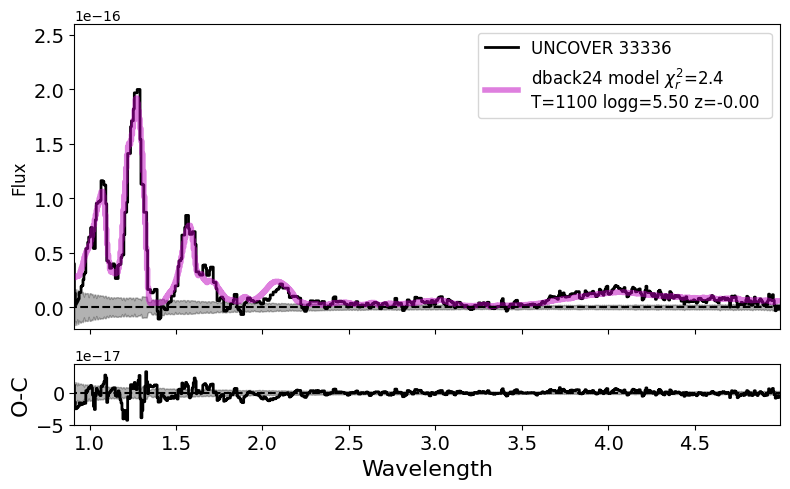

100%|███████████████████████████████████████| 1000/1000 [01:19<00:00, 12.55it/s]



Best parameters:
	model: dback24
	fsed: 9.75791874939729
	logg: 5.5
	teff: 1057.6472739222456
	z: -0.13725152272653446
	scale: 1.0842135153087864e-24
	chis: 1693.0772013114613
	radius: 0.00046183405093720313
	dof: 738
	rchi: 2.4027406499234862


<Figure size 640x480 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

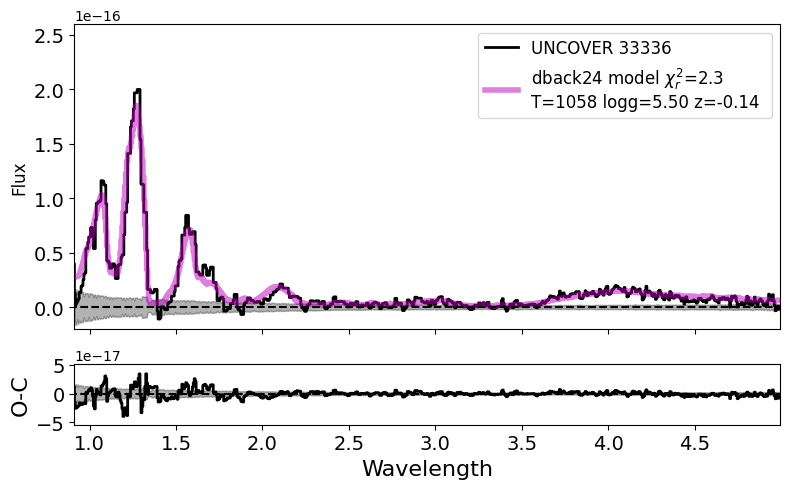

In [15]:
# Example with JWST NIRSPEC spectrum
models,wave = ucdmcmc.getModelSet('dback24','JWST-NIRSPEC-PRISM')

# read in spectrum from online location from Burgasser et al. 2023
sp = ucdmcmc.getSample(instrument='JWST-NIRSPEC-PRISM')
sp.info()

# scale to F444W AB magnitude
mag = 26.97
sp.fluxCalibrate('F444W',mag,ab=True)

# trim spectrum
sp.trim([0.9,5])

# map spectrum to grid models
sp.toWavelengths(wave)

# get initial parameters from gridfit
ipar = ucdmcmc.fitGrid(sp,models,file_prefix='test')

# run gridfit
par = ucdmcmc.fitMCMC(sp,models,p0=ipar,nstep=1000,iterim=250,report=True,file_prefix='mcmctest',verbose=False)


## Fine adjustments

In some cases (notably JWST/NIRSpec prism data), it may be necessary to make adjustments to the pixel or wavelength scale of the data due to projection effects or wavelength calibration errors. ucdmcmc provides several additional parameters to make adjustments to the model spectra to account for these:

* `pshift`: pixel shift
* `wshift`: wavelength shift (by default in micron unless specified by units)
* `rv`: radial velocity shift in km/s
* `vsini`: rotational broadening in km/s
* `lsf`: line spread function broadening modeled as a gaussian with fixed width in microns
* `foff`: additive flux offset $\epsilon_f$, quantified as $f\times\left(1 + \epsilon_f\times{\rm med}(f)\right)$
* `av`: reddening in magnitudes, assuming the [Cardelli et al. (1989)](https://ui.adsabs.harvard.edu/abs/1989ApJ...345..245C/abstract) law

These corrections are applied by functions associated with the Spectrum class.

Here's an example with the JWST NIRSpec spectrum that adjusts for a pixel offset using the `ucdmcmc.xcorr()` function.


Using model data file /Users/adam/python_codes/ucdmcmc/src/ucdmcmc/models/models_dback24_JWST-NIRSPEC-PRISM.h5
Reading in sample spectrum for instrument JWST-NIRSPEC-PRISM of source UNCOVER 33336

JWST-NIRSPEC-PRISM spectrum of UNCOVER 33336

Wave range = 0.58--5.33 micron
Flux range = -1.04e-16--2.00e-16 erg / (micron s cm2)
Average 1-pixel resolution = 334
S/N = 2 (50%), 7 (90%)

Citation bibcode reference 2024ApJ...962..177B (https://ui.adsabs.harvard.edu/abs/2024ApJ...962..177B/abstract)


Best parameters:
	model = dback24
	fsed = 10.0
	logg = 5.5
	teff = 1100.0
	z = -0.0
	scale = 9.221171573778434e-25
	chis = 1782.8335622432269
	radius = 0.0004259136837092894
	dof = 742.0
	rchi = 2.4027406499234862


<Figure size 640x480 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

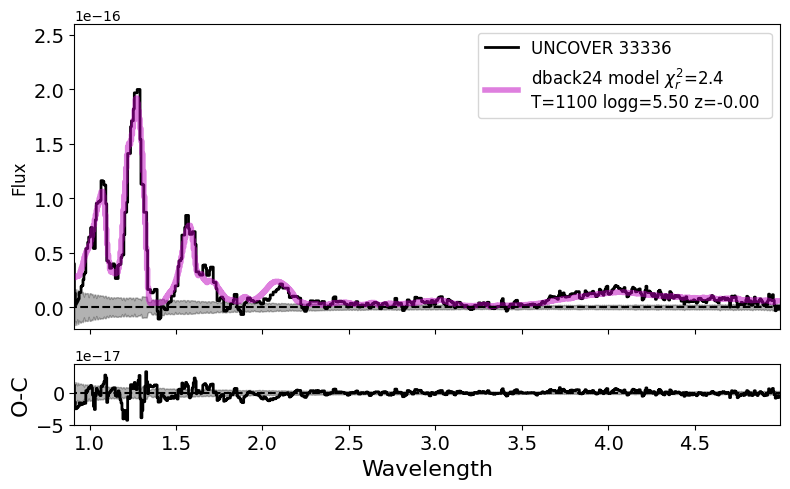

Pixel shift = 0.72


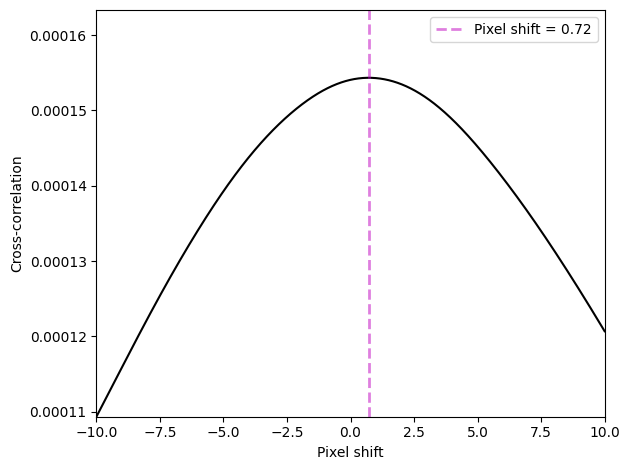

100%|███████████████████████████████████████| 1000/1000 [01:18<00:00, 12.76it/s]



Best parameters:
	model: dback24
	fsed: 9.59327683556168
	logg: 5.5
	teff: 1067.316559519398
	z: -0.09156565859216333
	scale: 1.04514586421428e-24
	chis: 1689.3495647847897
	radius: 0.0004534370415600486
	dof: 738
	rchi: 2.4027406499234862


<Figure size 640x480 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

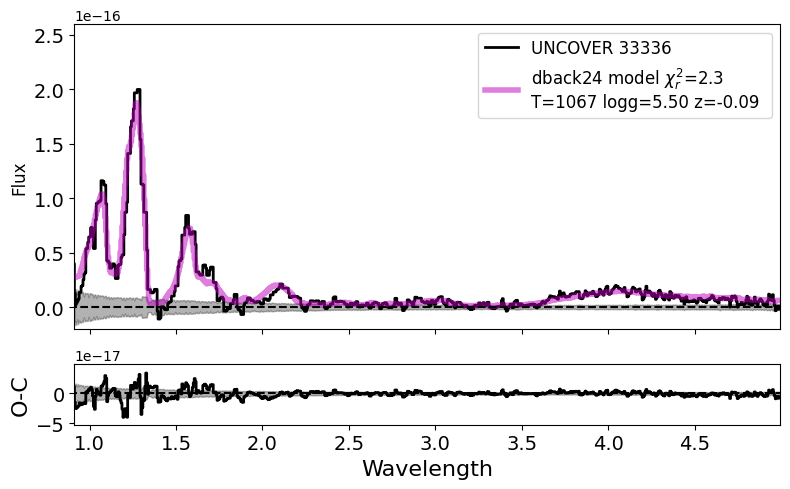

In [16]:
# Example with JWST NIRSPEC spectrum
models,wave = ucdmcmc.getModelSet('dback24','JWST-NIRSPEC-PRISM')

# read in spectrum from online location from Burgasser et al. 2023
sp = ucdmcmc.getSample(instrument='JWST-NIRSPEC-PRISM')
sp.info()

# scale to F444W AB magnitude
mag = 26.97
sp.fluxCalibrate('F444W',mag,ab=True)

# trim spectrum
sp.trim([0.9,5])

# map spectrum to grid models
sp.toWavelengths(wave)

# get initial parameters from gridfit
ipar = ucdmcmc.fitGrid(sp,models,file_prefix='test')

# the fit shows residuals suggesting a pixel shift; determine the shift by cross-correlation in the 1.0-1.6 micron range
mdl = ucdmcmc.getGridModel(models,ipar,wave)
pshft = ucdmcmc.xcorr(sp.flux.value,mdl.flux.value,wave=wave,fitrng=[1.0,1.6],resample=100,verbose=True,output='pixel')
ipar['pshift'] = pshft

# in addition, allow for an additive flux offset
ipar['foff'] = 0.

# run fitMCMC
par = ucdmcmc.fitMCMC(sp,models,p0=ipar,nstep=1000,iterim=250,report=True,file_prefix='mcmctest',verbose=False)



## Forthcoming features

The following features are anticipated for future iterations

* integration of EMCEE MCMC fitting

## Generating model grids (experimental)

Generally, if you are fitting a spectrum that is a different format than the instruments provided, or using a new model, you need to generate a new model grid. Currently, this can only be done if you have access to the original RAW models in your SPLAT model folder(s) 

In [ ]:
# read in the wavelength grid you are using
wave = ucdmcmc.readWave('JWST-NIRSPEC-PRISM')

# it is helpful to add constraints to your models, as some model sets are quite large (e.g., elfowl24)
constraints = {'teff':[600,3000],'logg':[4.5,6.0],'z':[-0.5,0.5],'co':[0.5,1.5],'enrich':[-0.25,0.25]}

# now run generateModelSet() providing the model name for which you have RAW models accessible to SPLAT
ucdmcmc.generateModelSet('btdusty16',wave=wave,constraints=constraints,output_prefix='models_btdusty16_JWST-NIRSPEC-PRISM',verbose=True,smooth=3,save_wave=False)

# when you're finished, check the grid
grid = ucdmcmc.readModelSet('models_btdusty16_JWST-NIRSPEC-PRISM.h5')
teffs = list(set(list(grid['teff'])))
teffs.sort()
for t in teffs:
    plt.clf()
    gs = grid[grid['teff']==t]
    for i in range(len(gs)): plt.plot(wave,gs['flux'].iloc[i])
    plt.title('Teff = {:.0f}'.format(t))
    plt.show()